In [1]:
import scvelo as scv
import scanpy as sc
scv.logging.print_version()

Running scvelo 0.2.2 (python 3.6.5) on 2021-01-11 12:38.


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc

In [3]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization


In [4]:
ong = '#ff8500' #3dpi
blu = '#0689f3' #0dpi
grn = '#039934' #7dpi
ppl = '#9B30FF' #young
teal = '#00FA9A' #aged
gry = '#9B9999' #TMS
ltblu = '#bdf5fb' #KO
dkblu = '#1224bd' #Rescue

d0 = '#33ceff'
d3 = '#68ff33'
d7 = '#ff6433'
IIb = '#ca33ff'
IIx = '#9826BF'
nmj_nuclei = '#651A80'
nmj_pax7 = '#061A20'
ylw = '#FCFF33'

In [5]:
adata = scv.read("scAging_Old_v2.h5ad")
adata

AnnData object with n_obs × n_vars = 29643 × 31053
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.5', 'seurat_clusters', 'timepoint', 'Celltype', 'nCount_integrated', 'nFeature_integrated'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [7]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Normalized count data: X, unspliced.
computing neighbors
    finished (0:00:15) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:48) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [8]:
scv.tl.velocity(adata)

computing velocities
    finished (0:02:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:25:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_AgedVelocityStream_nov11.pdf.png


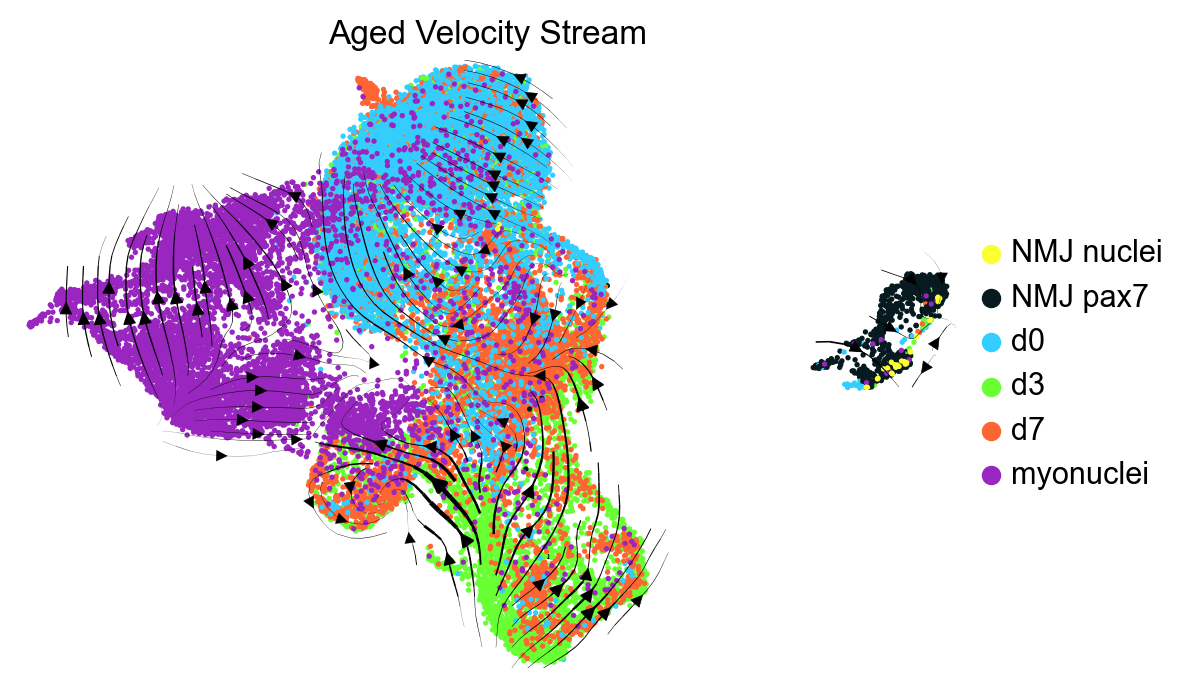

In [13]:
scv.pl.velocity_embedding_stream(adata, basis="umap", size = 15, alpha = 1,
                                 color="timepoint", palette = [ylw, nmj_pax7, d0, d3, d7, IIx], 
                                 legend_loc = 'right margin', title = 'Aged Velocity Stream', 
                                 save = 'AgedVelocityStream_nov11.pdf')

saving figure to file ./figures/scvelo_AgedVelocityEmbedding_v3.png


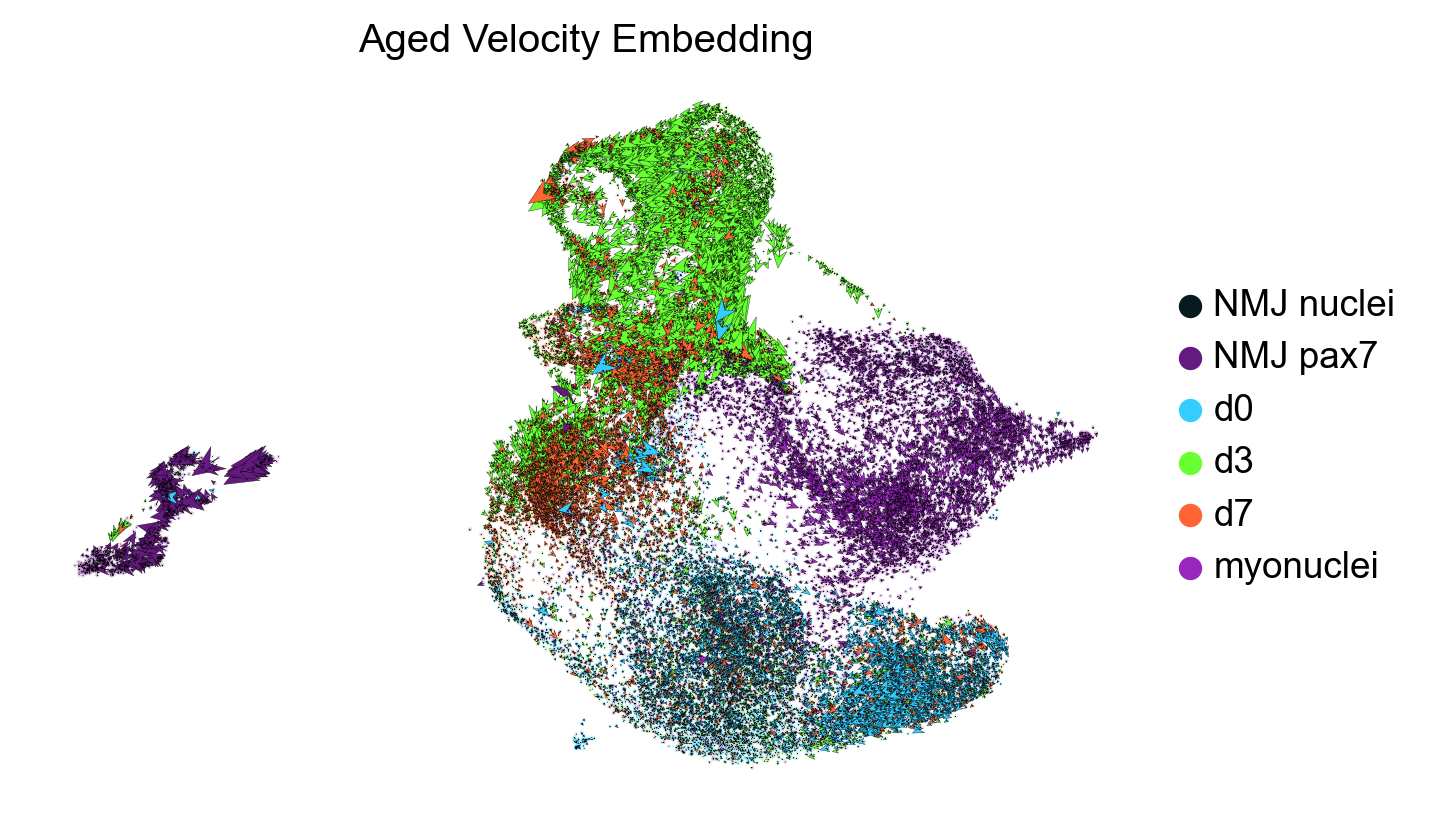

In [11]:
scv.pl.velocity_embedding(adata, basis="umap", color="timepoint", palette = [nmj_pax7, nmj_nuclei, d0, d3, d7, IIx],
                          legend_loc = 'right margin', title = 'Aged Velocity Embedding',
                          arrow_length=5, arrow_size=5, dpi=120,
                          save = 'AgedVelocityEmbedding_v3.png')

In [12]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (5:46:20) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [13]:
scv.tl.latent_time(adata)

computing terminal states
    identified 6 regions of root cells and 2 regions of end points .
    finished (0:00:06) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:01:33) --> added 
    'latent_time', shared time (adata.obs)


saving figure to file ./figures/scvelo_umap_latent_time.png


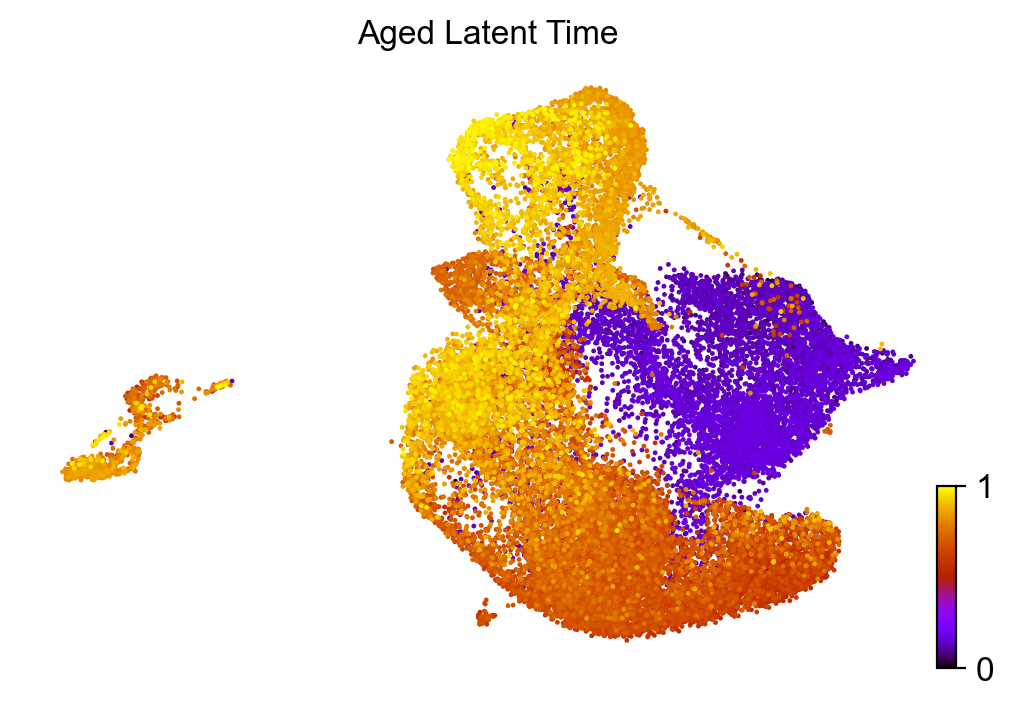

In [55]:
scv.pl.scatter(adata, color="latent_time", color_map="gnuplot", 
               rescale_color = [0,1],
               alpha = 1, title = 'Aged Latent Time',
               save = "umap_latent_time.png")

saving figure to file ./figures/scvelo_heatmap_heatmap_top_genes.png


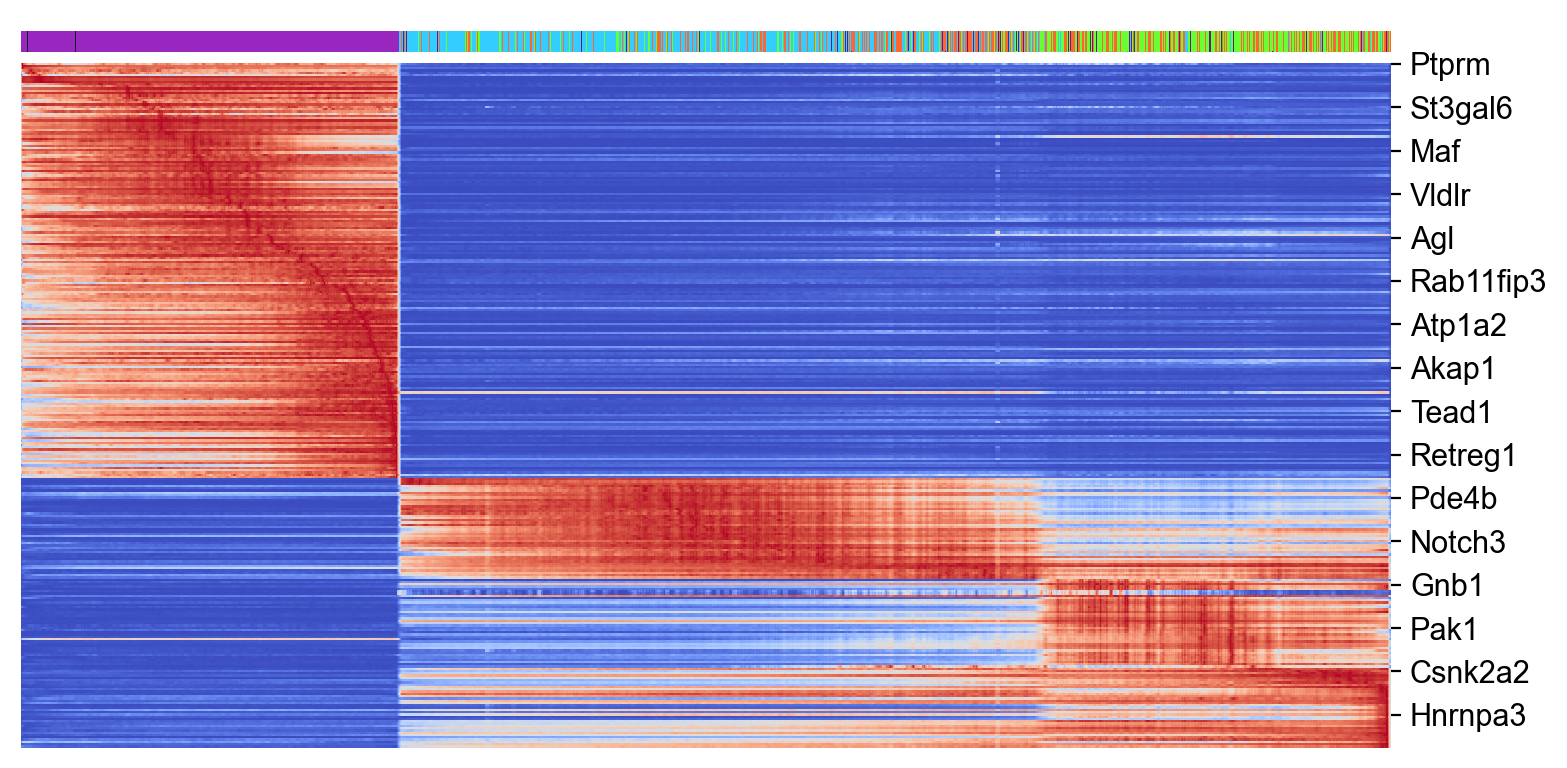

In [61]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby="latent_time", n_convolve=100,
               col_color="timepoint", palette = [nmj_pax7, nmj_nuclei, d0, d3, d7, IIx],
               colorbar = True, color_map = 'coolwarm',
               save = 'heatmap_top_genes.png')

In [59]:
df = pd.DataFrame(top_genes)
df.to_csv('top_velocity_genes.csv')

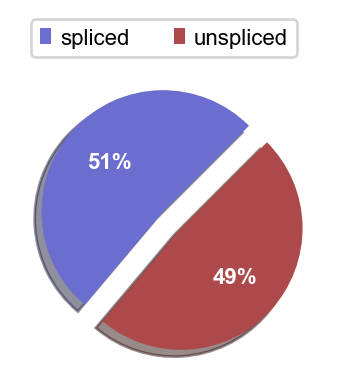

In [18]:
scv.pl.proportions(adata)

saving figure to file ./figures/scvelo_velocity_genes_jan11.pdf


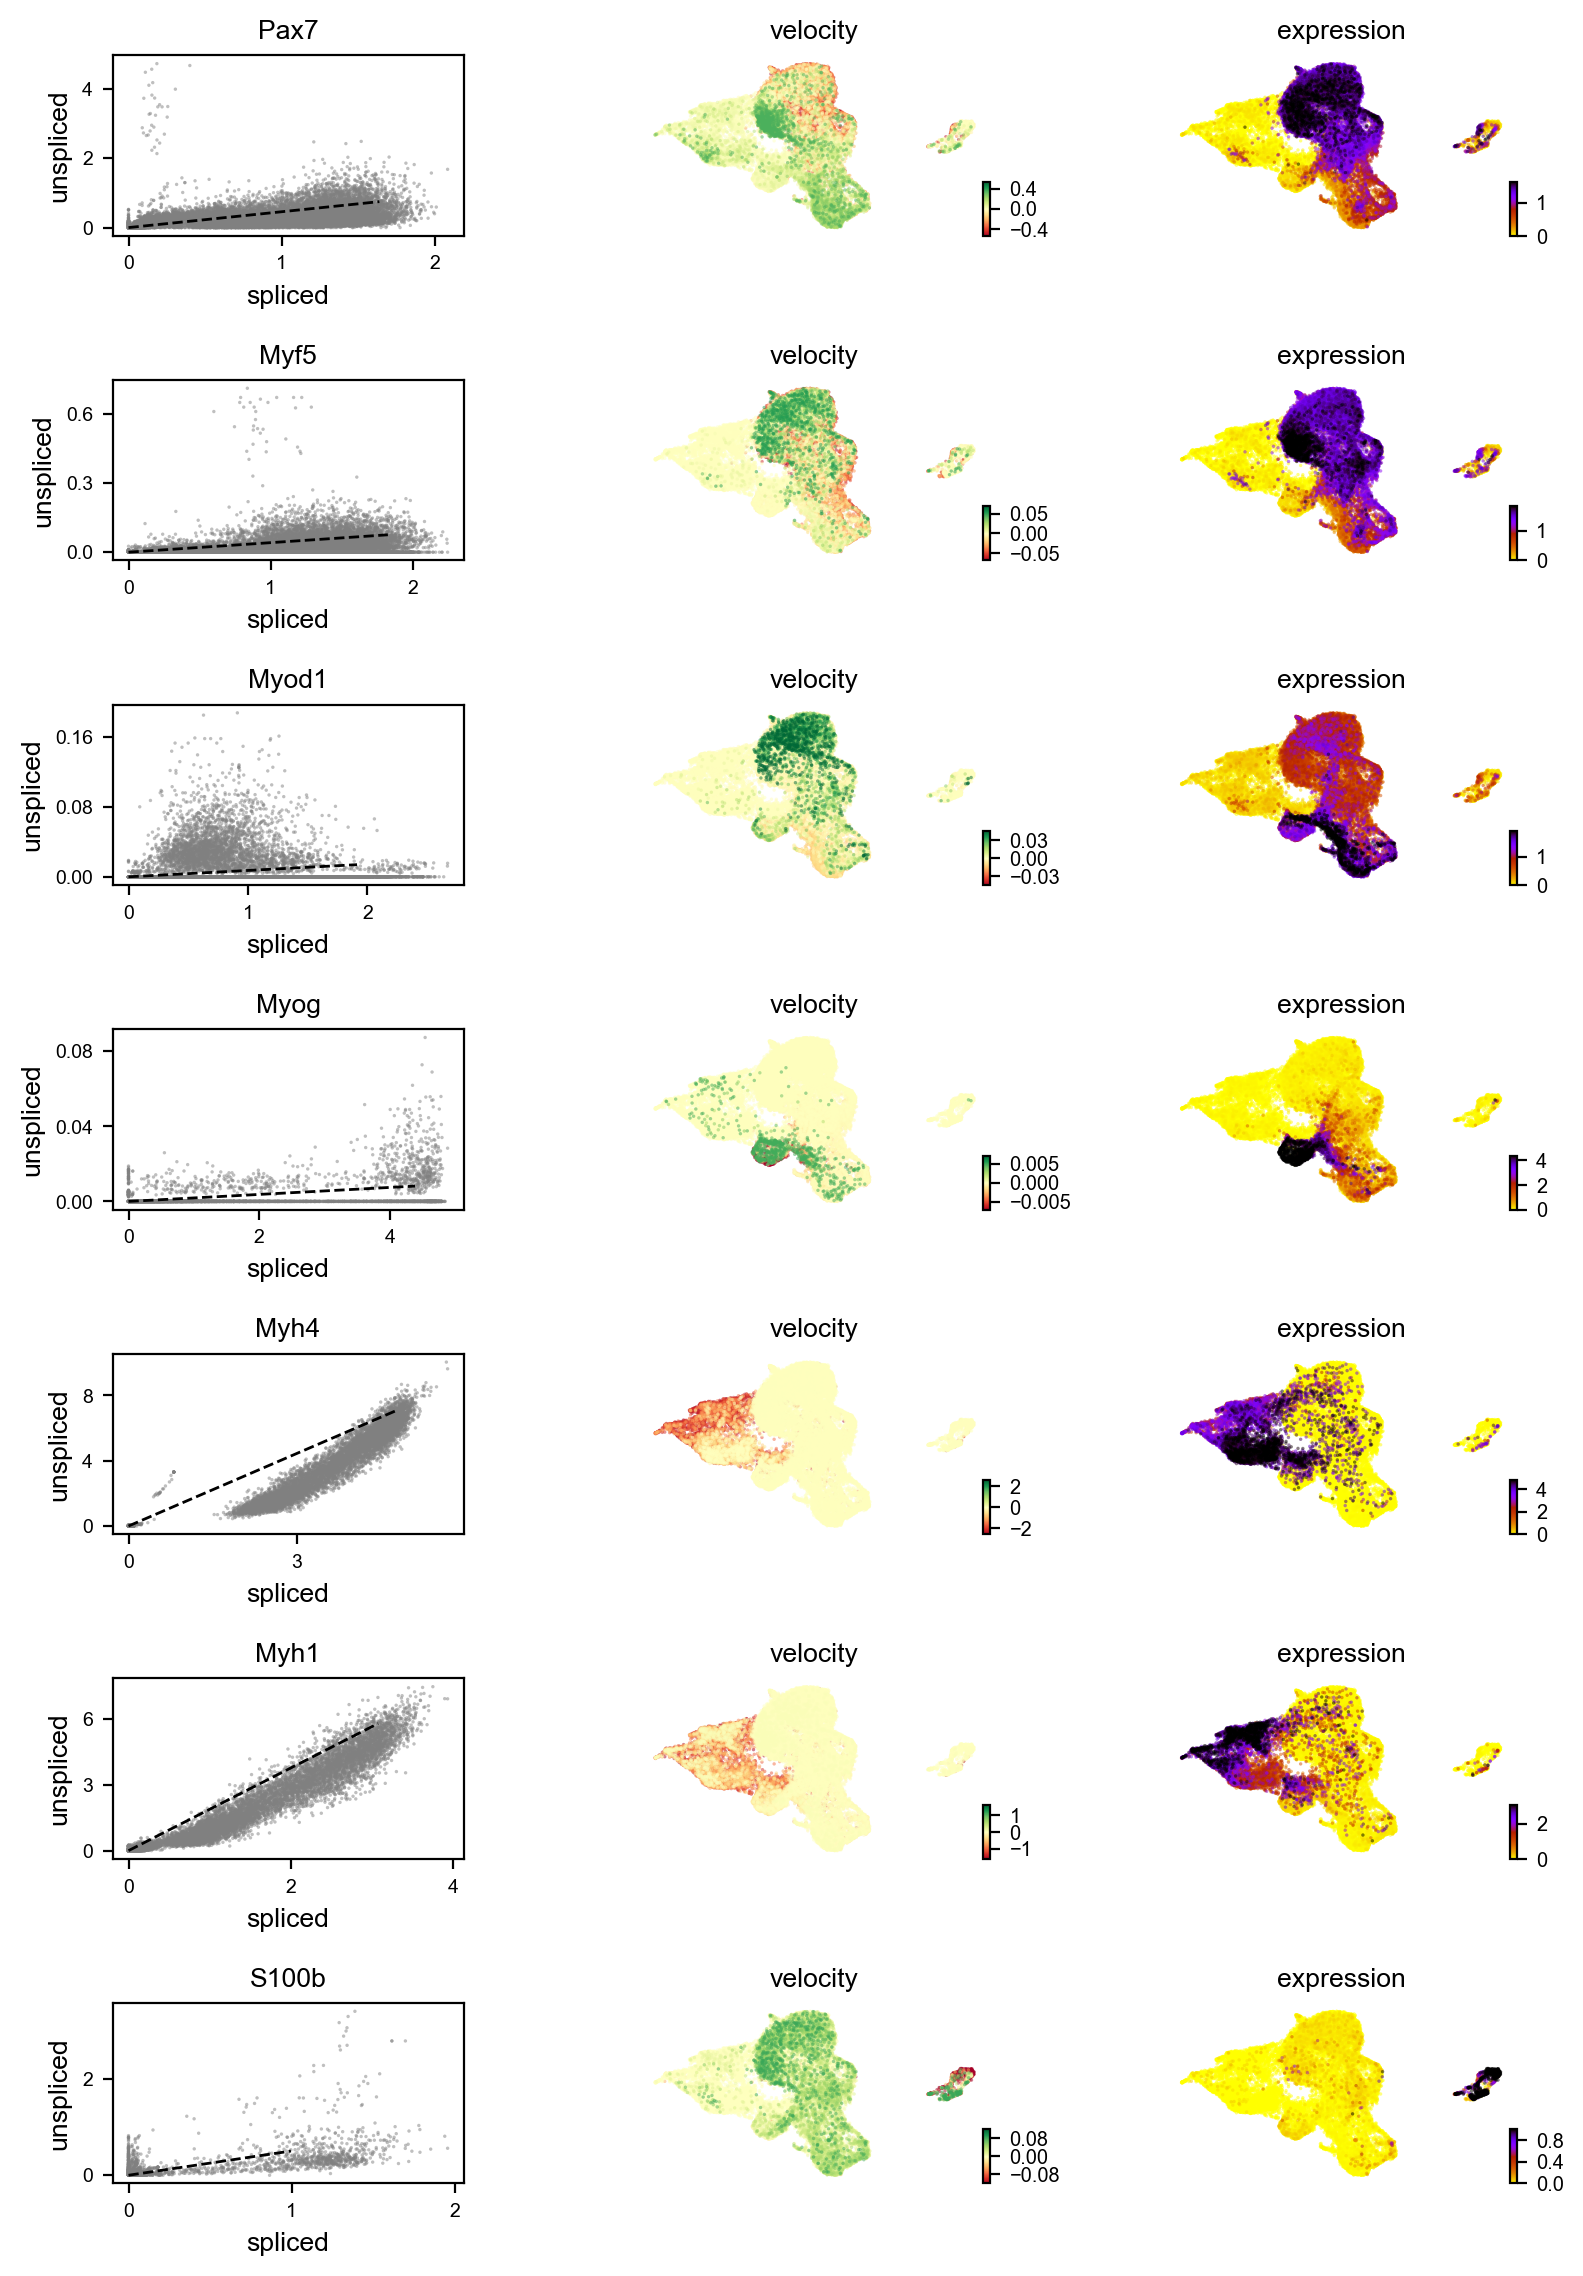

In [11]:
scv.pl.velocity(adata, ['Pax7', 'Myf5', 'Myod1', 'Myog', 'Myh4', 'Myh1', 'S100b'], ncols=1,
                save = 'velocity_genes_jan11.pdf')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo_velocity_confidence.png


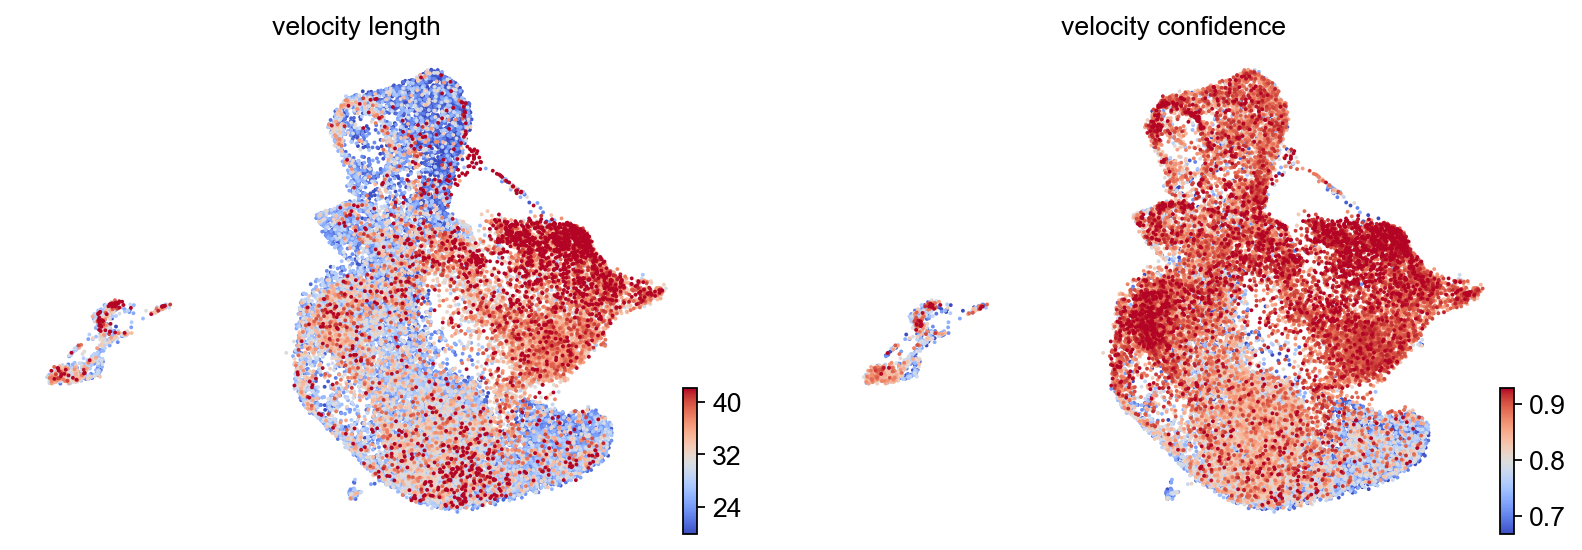

In [20]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], save = 'velocity_confidence.png')


In [21]:
df = adata.obs.groupby('timepoint')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

saving figure to file ./figures/scvelo_aged_velocity_connection_nov11.png


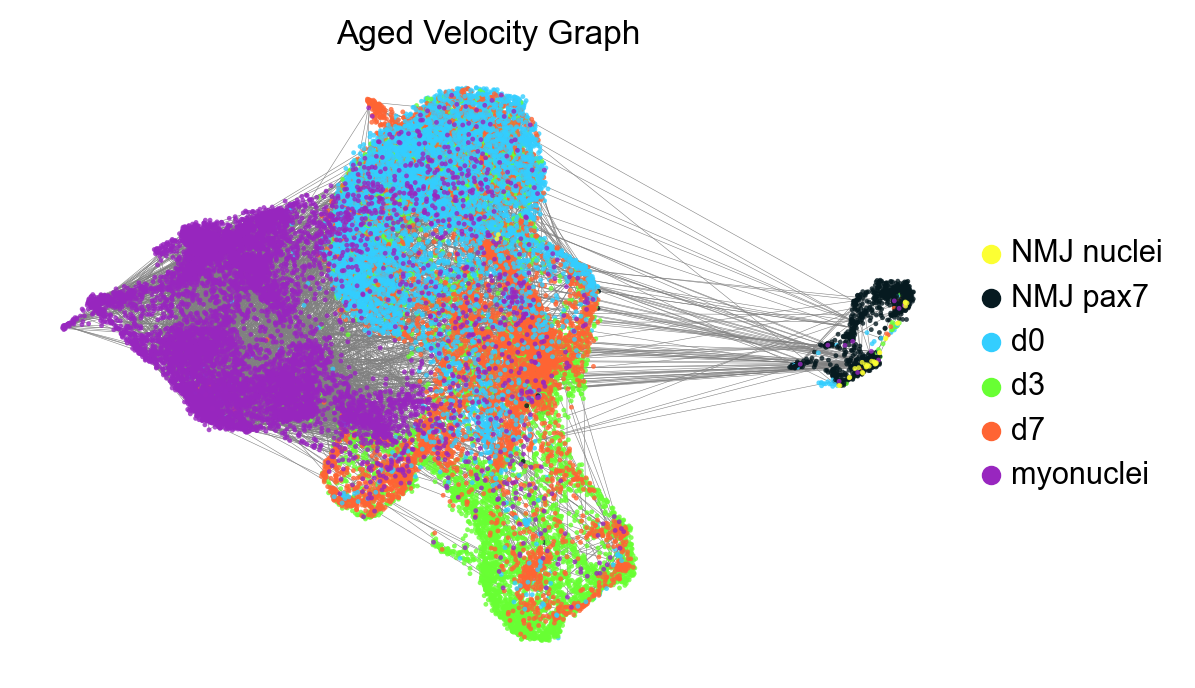

In [15]:
scv.pl.velocity_graph(adata, threshold=.35, color = 'timepoint', palette = [ylw, nmj_pax7, d0, d3, d7, IIx],
                     legend_loc = 'right margin', title = 'Aged Velocity Graph', save = 'aged_velocity_connection_nov11.png')

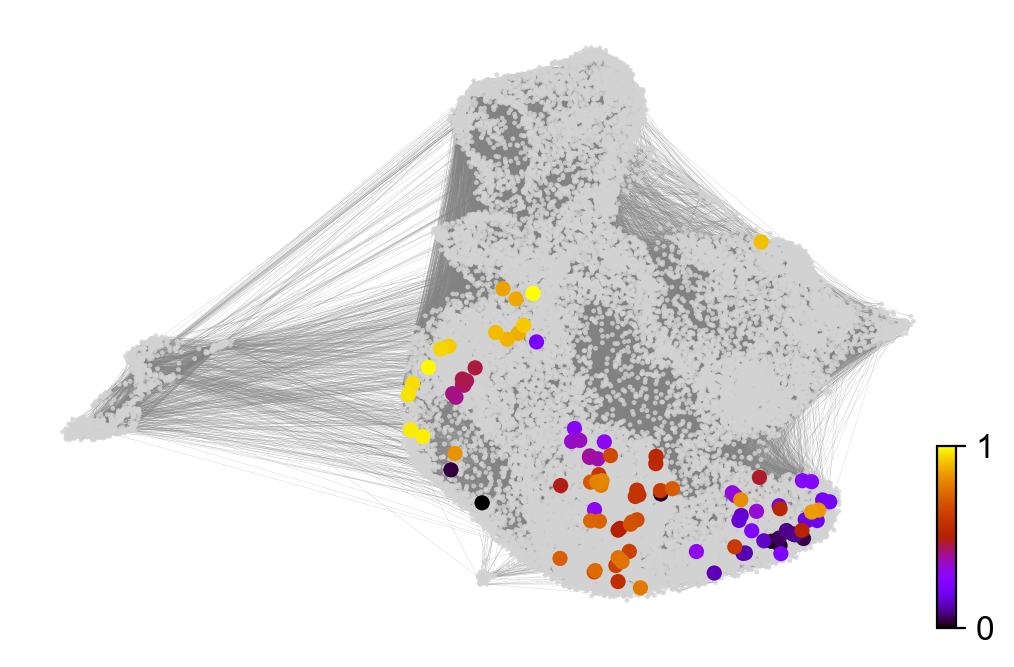

In [52]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=1000)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)


saving figure to file ./figures/scvelo_aged_velocity_pseudotime.png


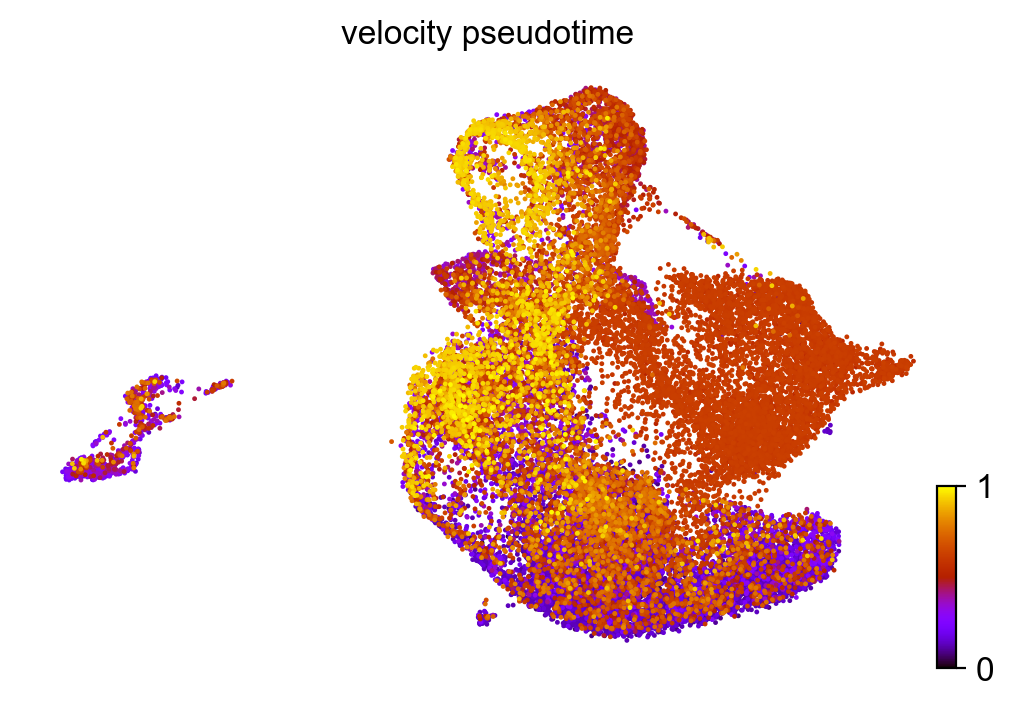

In [53]:
scv.tl.velocity_pseudotime(adata, root_key = 1000)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot',
              save = 'aged_velocity_pseudotime.png')


Dynamical Modeling

In [27]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:04:51) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:14:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_AgedVelocityStream_dynamical.png


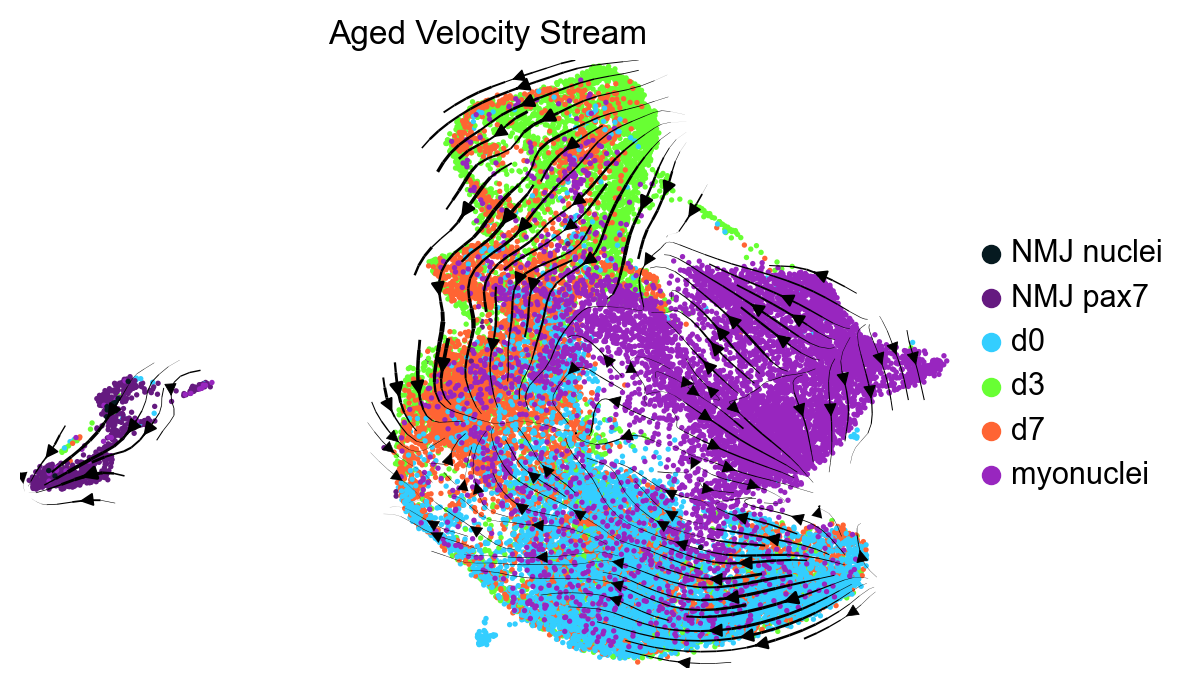

In [29]:
scv.pl.velocity_embedding_stream(adata, basis="umap", size = 15, alpha = 1,
                                 color="timepoint", palette = [nmj_pax7, nmj_nuclei, d0, d3, d7, IIx], 
                                 legend_loc = 'right margin', title = 'Aged Velocity Stream',
                                save = 'AgedVelocityStream_dynamical.png')

PAGA

In [30]:
!pip install python-igraph --upgrade --quiet

In [34]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='seurat_clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')


running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:06) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


saving figure to file ./figures/scvelo_aged_paga.png


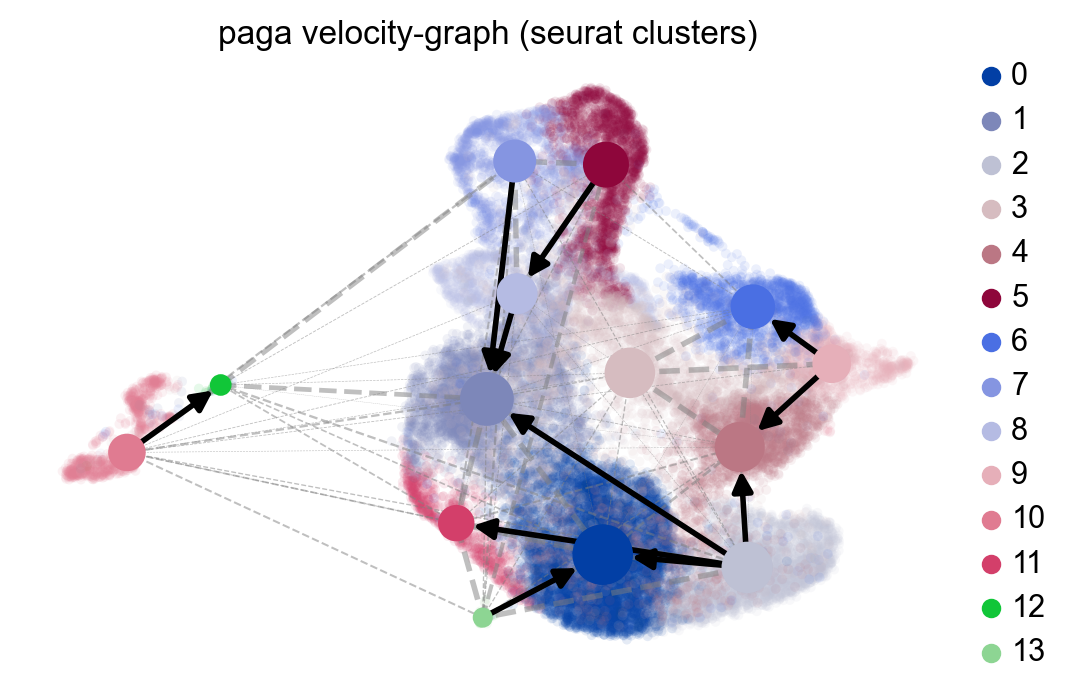

In [35]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5,
           save = 'aged_paga.png')